In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [3]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
# Checar estrutura do DataSet 
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
df_pontuacao

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
...,...,...
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795


### EDA (Análise exploratória de dados)

In [6]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

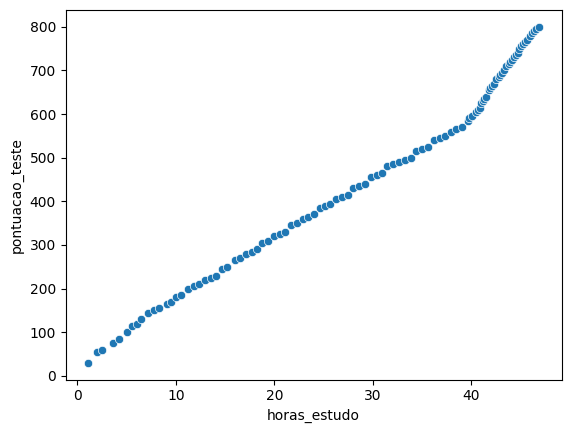

In [7]:
# Plot de dispersão
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

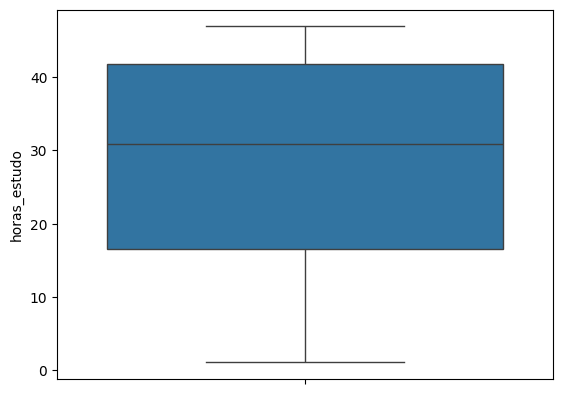

In [8]:
# Verificar se temos outliers
sns.boxplot(df_pontuacao, y= 'horas_estudo')

<Axes: ylabel='pontuacao_teste'>

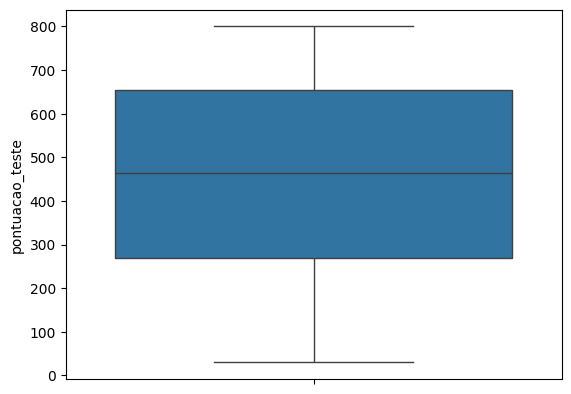

In [9]:
# Verificar se temos outliers
sns.boxplot(df_pontuacao, y= 'pontuacao_teste')

<Axes: >

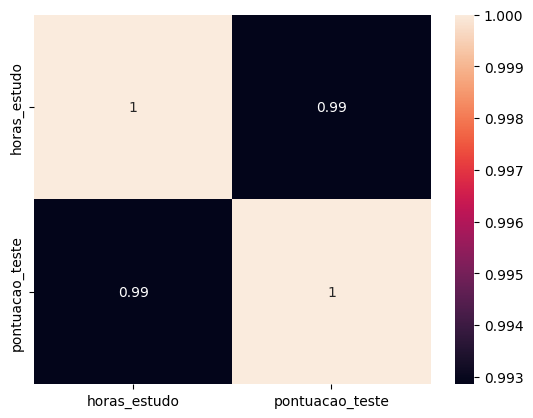

In [10]:
# Verificar Correlação - pearson 
sns.heatmap(df_pontuacao.corr('pearson'), annot= True)

<Axes: >

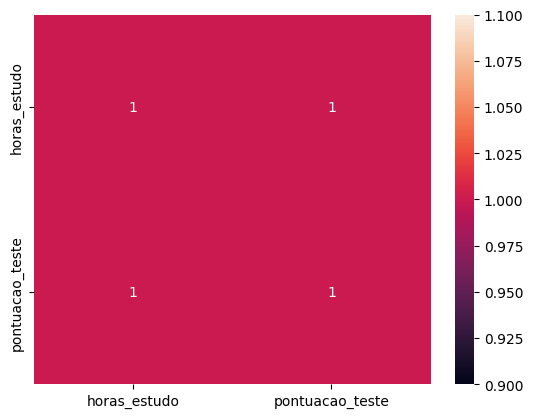

In [12]:
# Verificar Correlação - Spearman 
sns.heatmap(df_pontuacao.corr('spearman'), annot= True)

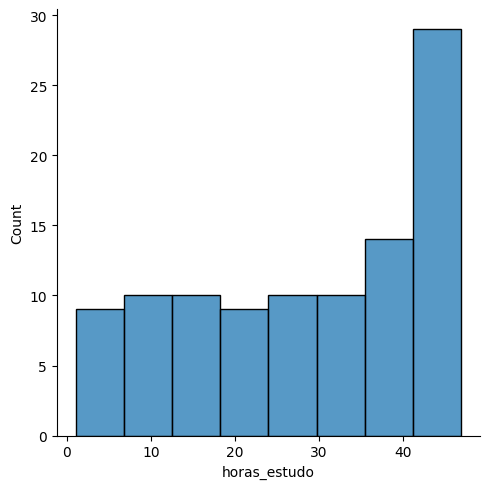

In [13]:
# Histograma
sns.displot(df_pontuacao,x='horas_estudo')

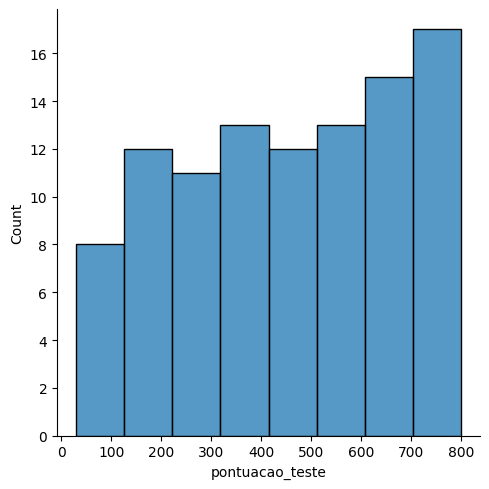

In [14]:
# Histograma
sns.displot(df_pontuacao,x='pontuacao_teste')

### Treinar Modelo

In [16]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
Y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=50)

In [17]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [18]:
# Treinar o modelo
reg_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Imprimir a equação da reta
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601
